# Selection Sort

## Importando bibliotecas

In [1]:
import numpy as np
from time import perf_counter
from pandas import DataFrame
from seaborn import pointplot, set_style

# Constante
LISTA_DE_TAMANHOS = np.array([1000, 2000, 3000,
                              4000, 5000, 8000,
                              11_000, 15_000])

## Algoritmo

In [2]:
def selection(arr:'np.ndarray[float]') -> None:
  """
  Selection Sort
  ---
  Ordena o arr de forma crescente.
  Dado o array de tamanho `n`, em cada iteração `i` define:
  `arr[i]` como o menor elemento dentro do pedaço `arr[i:n]`;
  o elemento que estava previamente em `arr[i]` troca de lugar
  com o novo
  """
  n = len(arr)
  i = 0
  for i in range(n):
    i_min = i
    for j in range(i, n):
      if arr[j] < arr[i]:
        i_min = j
    arr[i], arr[i_min] = arr[i_min], arr[i]


## Bateria de testes de desempenho

In [3]:
data = dict()

for ordem in ['crescente', 'aleatoria', 'decrescente']:
  tempos = list()
  for tamanho in LISTA_DE_TAMANHOS:
    # Gerando amostra do teste
    if ordem == 'crescente':
      amostra = np.arange(tamanho, dtype=float)
    elif ordem == 'decrescente':
      amostra = np.arange(tamanho, dtype=float)[::-1].copy()
    else:
      amostra = np.random.sample(tamanho)
    
    # testando performance
    start = perf_counter()
    selection(amostra)
    stop = perf_counter()
    
    # salvando resultado
    tempos.append(stop - start)
  data[ordem] = tempos
data['tamanhos'] = LISTA_DE_TAMANHOS

df = DataFrame(data=data)
df.style.hide_index()

crescente,aleatoria,decrescente,tamanhos
0.560914,0.205155,0.186219,1000
1.428078,0.764806,0.735845,2000
2.636878,1.729896,1.733361,3000
5.533146,3.338659,3.005148,4000
8.070192,5.156073,4.734550,5000
17.534334,12.800869,11.988522,8000
36.714351,23.758613,22.434905,11000
65.980807,42.716445,46.194076,15000


## Resultados

O pior caso é quando a lista se encontra ordenada de forma crescente


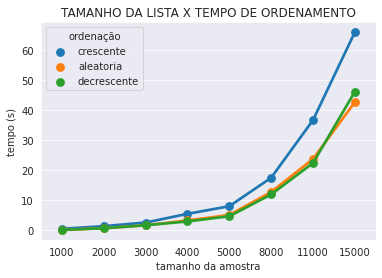

In [4]:
# Remodela o dataframe para uma versão longa mais fácil de plotar
long_df = df.melt(id_vars='tamanhos', var_name='ordenação', value_name='tempos')

set_style('darkgrid')
pointplot(
  data=long_df,
  x='tamanhos',
  y='tempos',
  hue='ordenação',
  ).set(
    xlabel='tamanho da amostra',
    ylabel='tempo (s)',
    title='TAMANHO DA LISTA X TEMPO DE ORDENAMENTO')

ordem = long_df.sort_values(by='tempos', ascending=False)['ordenação'].values[0]
print(f'O pior caso é quando a lista se encontra ordenada de forma {ordem}')